In [1]:
import torch
import lightning
from minicons import cwe
import pandas as pd

from model import FFNModule, FeatureNormPredictor, FFNParams, TrainingParams

/home/jjr4354/.conda/envs/jwalenv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model_name = 'saved_models/chronis_et_al/bert_to_binder_layer8_stopped_opt'
lm = cwe.CWE('bert-base-uncased')
model = FeatureNormPredictor.load_from_checkpoint(
    checkpoint_path=model_name+'.ckpt',
    map_location=None
    )
model.eval()
print(model_name+" hyperparams: ")
print("    ",model.ffn_params)
print("    ",model.training_params)

saved_models/chronis_et_al/bert_to_binder_layer8_stopped_opt hyperparams: 
     input_size=768 output_size=65 hidden_size=108 num_layers=2 dropout=0.1
     num_epochs=100 batch_size=29 learning_rate=0.0009698669239288068 weight_decay=0.0


In [3]:
rob_emb = lm.extract_representation(("A wug is a robin", "robin"))
rob_pred = torch.nn.functional.relu(model(rob_emb))
rob_pred = rob_pred.squeeze(0)
wug_emb = lm.extract_representation(("A wug is a robin", "wug"))
wug_pred = torch.nn.functional.relu(model(wug_emb))
wug_pred = wug_pred.squeeze(0)


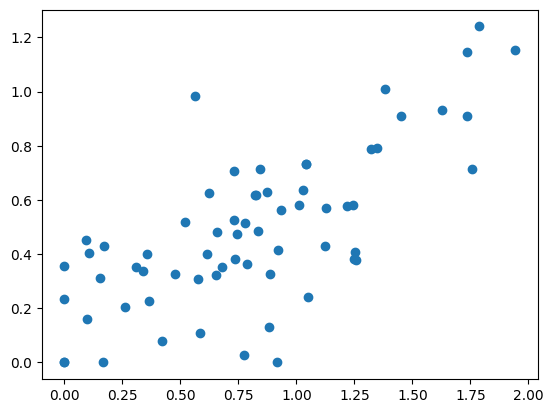

In [4]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(rob_pred.detach().numpy(), wug_pred.detach().numpy())
plt.show()

In [5]:
wug_reg_emb = lm.extract_representation(("A wug", "wug"))
wug_reg_pred = torch.nn.functional.relu(model(wug_reg_emb))
wug_reg_pred = wug_reg_pred.squeeze(0)

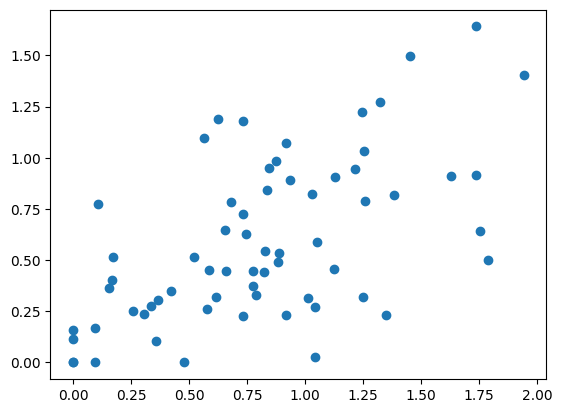

In [6]:
plt.figure()
plt.scatter(rob_pred.detach().numpy(), wug_reg_pred.detach().numpy())
plt.show()

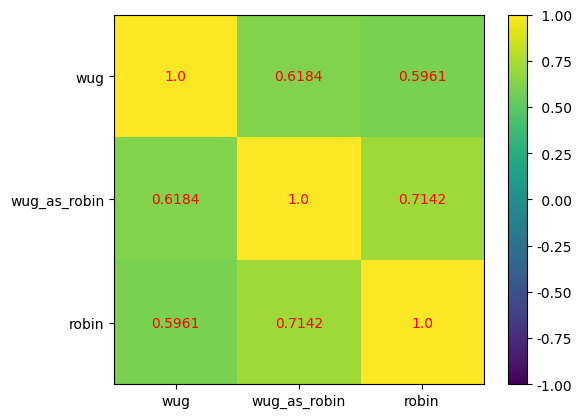

In [7]:
import numpy as np

all3 = np.array((wug_reg_pred.detach().numpy(), wug_pred.detach().numpy(), rob_pred.detach().numpy()))

corr_matrix = np.corrcoef(all3).round(decimals=4)

fig, ax = plt.subplots()
im = ax.imshow(corr_matrix)
im.set_clim(-1, 1)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1, 2), ticklabels=('wug', 'wug_as_robin', 'robin'))
ax.yaxis.set(ticks=(0, 1, 2), ticklabels=('wug', 'wug_as_robin', 'robin'))
ax.set_ylim(2.5, -0.5)
for i in range(3):
    for j in range(3):
        ax.text(j, i, corr_matrix[i, j], ha='center', va='center',
                color='r')
cbar = ax.figure.colorbar(im, ax=ax, format='% .2f')
plt.show()

In [31]:
models = [FeatureNormPredictor.load_from_checkpoint(
    checkpoint_path='saved_models/comps/albert{}_to_binder_opt_stop.ckpt'.format(i),
    map_location=None
    ) for i in range(0,13)] # fill this out once we actually have the models

for model in models:
    model.eval()
lm = cwe.CWE('albert-xxlarge-v2')

rob_emb = [lm.extract_representation(("A wug is a robin", "robin"), layer=i) for layer in range(0,13)]
wug_emb = [lm.extract_representation(("A wug is a robin", "wug"), layer=i) for layer in range(0,13)]

In [29]:
models = [FeatureNormPredictor.load_from_checkpoint(
    checkpoint_path='saved_models/comps/bert{}_to_binder_opt_stop.ckpt'.format(i),
    map_location=None
    ) for i in range(0,13)] # fill this out once we actually have the models
for model in models:
    model.eval()
lm = cwe.CWE('bert-base-uncased')

rob_emb = [lm.extract_representation(("A wug is a robin", "robin"), layer=i) for layer in range(0,13)]
wug_emb = [lm.extract_representation(("A wug is a robin", "wug"), layer=i) for layer in range(0,13)]

In [33]:


rob_emb = [lm.extract_representation(("A wug is a robin", "robin"), layer=i) for layer in range(0,13)]
wug_emb = [lm.extract_representation(("A wug is a robin", "wug"), layer=i) for layer in range(0,13)]
rs = []

for i in range(0,13):
    model=models[i]
    rob_pred = torch.nn.functional.relu(model(rob_emb[i]))
    rob_pred = rob_pred.squeeze(0)
    wug_pred = torch.nn.functional.relu(model(wug_emb[i]))
    wug_pred = wug_pred.squeeze(0)
    r = np.corrcoef(rob_pred.detach().numpy(), wug_pred.detach().numpy())
    rs.append(r[0,1])

most = np.argmax(np.array(rs))
 
print("most correlated layer: ", most)

most correlated layer:  2


In [ ]:
hi = [i+.1 for i in range(10) if i > 0]
hi

[1.1, 2.1, 3.1, 4.1, 5.1, 6.1, 7.1, 8.1, 9.1]